In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Problem 1 - Clustering with κ-means

### 1. 

In [23]:
import numpy as np
from sklearn import datasets

datasets = datasets.load_breast_cancer()
# "data{ndarray, dataframe} of shape (569, 30) --> (samples, dimensionality)"

p1_dataset = datasets['data'] # dataset

def k_means(dataset, k):
  n = len(dataset)

  # data structures for centroid calculation
  centroids, prev_centroids, centroid_groups = [], [], {}

  # Picking initial centroids, (second approach)
  for i in range(k):
    centroids.append(dataset[i])
    centroid_groups[i] = []

  # data structures for 
  cluster_assignments = n*[None]
  cluster_idx_assignments = n*[None]

  iterations = 0

  # iterate through k means
  while not np.array_equal(centroids, prev_centroids):
    iterations+=1

    cluster_assignments = n*[None]
    cluster_idx_assignments = n*[None]

    # find clusters/centroids for each datapoint
    for i in range(n):
      centroid_idx = -1
      for c in range(k):
        if cluster_assignments[i] is None:
          cluster_assignments[i] = centroids[c]
          cluster_idx_assignments[i] = c
          centroid_idx = c
        elif not np.array_equal(centroids[c], cluster_assignments[i]) and np.linalg.norm(dataset[i]-centroids[c]) < np.linalg.norm(dataset[i]-cluster_assignments[i]):
          cluster_assignments[i] = centroids[c]
          cluster_idx_assignments[i] = c
          centroid_idx = c
      centroid_groups[centroid_idx].append(dataset[i])
    
    # recalculate centroids
    prev_centroids = centroids[:]
    for i in range(k):
      centroids[i] = sum(centroid_groups[i])/len(centroid_groups[i])
      centroid_groups[i].clear()
    
  # calculate the distortion
  distortion = 0.0
  for i in range(n):
    distortion += np.linalg.norm(dataset[i]-centroids[cluster_idx_assignments[i]])**2

  # return 4 args: 
  #   [] centroids
  #   [] cluster_assignments (cluster_assignments[i] -> the cluster centroid for dataset[i])
  #   [] cluster_idx_assignments (cluster_idx_assignments[i] -> index of cluster centroid for dataset[i])
  #   distortion (averaging by returning 'distortion/n')
  return centroids, cluster_assignments, cluster_idx_assignments, distortion/n 

### 2. 

In [24]:
k_start, k_end = 2, 7
for k in range(k_start, k_end+1):
  k_means(p1_dataset, k)

The required inputs for implementing k-means algorithm on a dataset is **(1)** "k", or the number of clusters to group datapoints into, and **(2)** the dataset itself. These were the only two arguments I have given to my `k_means(dataset, k)` function; the function uses a passed-in dataset to create "k" distinct groupings of datapoints.

### 3. 

In [25]:
distortions = {} #_x, distortions_y = [], []
distortions['x'], distortions['y'] = [], []

k_start, k_end = 2, 7
for k in range(k_start, k_end+1):
  _, _, _, distortion = k_means(p1_dataset, k)
  distortions['x'].append(k)
  distortions['y'].append(distortion)

# matplotlib.pyplot.plot(distortions_x, distortions_y, 'x', 'y')


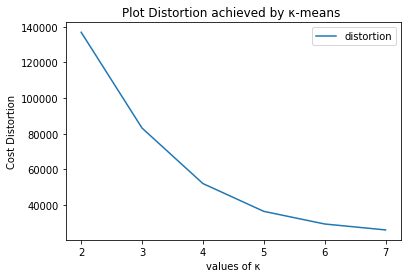

In [26]:
import matplotlib.pyplot as plt

plt.plot(distortions['x'], distortions['y'], label = "distortion")

plt.xlabel('values of κ')
plt.ylabel('Cost Distortion')
plt.title('Plot Distortion achieved by κ-means ')
plt.legend()

### 4. 


The best κ-value can be chosen based on a distortion plot for varying κ. Using a distortion plot, you can judge the line/curve to find the point of **inflection** or the point where the distortion stops decreasing as rapidly and select this point to judge the best κ value.

From the appearance of the plot created above in part 3, it is a bit hard to judge when this point is (κ=3 or κ=4 seem like good selections), but it appears to be at around **κ = 4**.

# Problem 2 - Lack of optimality of κ-means

### Assumption: Any κ-means will converge to a globally optimal solution.

Below I will look at κ-means over a dataset (`[1,2,3,4]`) with 2 different starting centroid selections.

### **(1)** Picking centroids μ1, μ2 = 2, 4
**Initial Conditions:**
```
[x1,x2,x3,x4] = [1,2,3,4]
κ = 2 #k
μ1, μ2 = 2, 4
```

**Iteration 1:**
```
Cluster 1 (points grouped with μ1): [1,2,3] # "you may assume that if a pointx(i)is equally distant to multiple centroids, the point will be assigned to the centroid whose index is smallest"
Cluster 2 (points grouped with μ2): [4]

μ1 -> average([1,2,3]) = 2
μ2 -> average([4]) = 4
```

**Final Clusters (iterations completed because the centroids didn't change in value):**
```
Cluster 1 (points grouped with μ1): [1,2,3]
Cluster 2 (points grouped with μ2): [4]
```

### **(2)** Picking centroids μ1, μ2 = 1.5, 3.5

**Initial Conditions:**
```
[x1,x2,x3,x4] = [1,2,3,4]
κ = 2 #k
μ1, μ2 = 1.5, 3.5
```

**Iteration 1:**
```
Cluster 1 (points grouped with μ1): [1,2] 
Cluster 2 (points grouped with μ2): [3,4]

μ1 -> average([1,2]) = 1.5
μ2 -> average([3,4]) = 3.5
```

**Final Clusters (iterations completed because the centroids didn't change in value):**
```
Cluster 1 (points grouped with μ1): [1,2]
Cluster 2 (points grouped with μ2): [3,4]
```

The analysis of κ-means above for 2 different initial centroid selections ((1) and (2) above) yields 2 different clustering solutions, one being more **balanced** and optimal than the other. By contradiction of the above assumption, κ-means does not necessarily converge to a globally optimal solution, and therefore might converge to a solution that is not globally optimal.

# Problem 3 - Problem 3 - SVD

### 1.

```
A = [1 2 1]
    [2 3 1]
```
The dimensions of matrix `A` are 2x3 so the rank of matrix A must be <= 2. To determine the rank of a matrix, convert it to echelon form, and find the number of non-zero rows (this will be the rank).
```
A = [1 2 1]
    [2 3 1]
# the first leading entry of the first row is '1' so multiply the first row by 2, and subtract this from the second row so that the leading entry of the second row will not be in the same column as that from the first row.
A = [1 2 1] ------------->    A = [1  2  1]
    [2 3 1] - 2*[1 2 1] ->        [0 -1 -1]

# The above matrix is in echelon form; leading entries in each row are 1/-1, and the column of the first leading entry in the second row is in a differnt column than the first leading entry in the first row (there are no rows with zero elements).

```
The echelon form of matrix A was determined above, and there are 2 non=zero rows, therefore `rank([A]) == 2`

### 2.

Given matrix A, its singular values (`σ`) are equal to the squareroot of the eigenvalues of A<sup>T</sup>A (`σ = √(λ)`). The eigenvalue(s) of a matrix are values such that the matrix multiplied by a vector is equivalent to the eiganvalue(s) multiplied by the same vector (eigenvector):
```
Ax = λx   # x is a vector
Ax - λx = 0
(A - λI)*x = 0   # I is the identity matrix
|A - λI| = 0   # "|...|" is the determinant
```
Finding A<sup>T</sup>A:
```
[1 2] * [1 2 1]    =  [(1*1 + 2*2)  (1*2 + 2*3)  (1*1 + 2*1)]     [5   8  3]
[2 3]   [2 3 1]       [(2*1 + 3*2)  (2*2 + 3*3)  (2*1 + 3*1)]  =  [8  13  5]
[1 1]                 [(1*1 + 1*2)  (1*2 + 1*3)  (1*1 + 1*1)]     [3   5  2]
```
Finding the eigenvalues of A<sup>T</sup>A (determinant of (A<sup>T</sup>A - λI)):
```
[3   8  3]   [λ 0 0]     [3-λ     8      3] 
[8  13  5] - [0 λ 0]  =  [9    13-λ      5]
[3   5  2]   [0 0 λ]     [3       5    2-λ]

det([3-λ     8      3])     
   ([9    13-λ      5])  =  (3-λ)((13-λ)(2-λ) - (5)(5)) - 8(9(2-λ) - (5)(3)) + 3((9)(5) - (13 - λ)(3))  =  0
   ([3       5    2-λ])

(-3 + 20λ + - λ^2)λ = 0  # one eigenvalue is λ = 0, solve for remaining λ using quadratic formula

λ = (20 ± √((-20)^2 - 4(1)(3)) ) / 2(1) = 10 ± (2√97)/2 = 10 ± √97
```
The eigenvalues of A<sup>T</sup>A are 0, 10 ± √97 <p>λ<sub>1</sub> = 10 + √97</p><p>λ<sub>2</sub> = 10 - √97</p><p>λ<sub>3</sub> = 0</p>

***

<b>Singular values (σ):
<p>σ<sub>1</sub> = √(λ<sub>1</sub>) = √(10 + √97)</p>
<p>σ<sub>2</sub> = √(λ<sub>2</sub>) = √(10 - √97)</p>
</b>

### 3.

Below is a description of SVD, specifically how to obtain the U and V matrices in a SVD of a matrix, A. This defines how I will solve for U and V.
```
A = U∑V^T

A ~ m x n
U ~ m x m
V ~ n x n

V = [ |    |      ]
    [v_1  v_2  ...]
    [ |    |      ]

# v_i is a vector, where v_i = (w_i)/(||w_i||) where w_i is eigenvector i, and "||...||" is magnitude

U = [ |    |      ]
    [u_1  u_2  ...]
    [ |    |      ]

# u_i is a vector, where u_i = (1/σ_i)*A*v_i 
```

Solving for the eigenvectors [A<sup>T</sup>A - λ<sub>i</sub>I]w<sub>i</sub> = 0:
```
[3-λ     8       3]   [w_11]   [0]
[9    13-λ       5] * [w_12] = [0]
[3        5    2-λ]   [w_13]   [0]

(3-λ)w_11 + (8)w_12 + (3)w_13  = 0
(9)w_11 + (13-λ)w_12 + (5)w_13 = 0
(3)w_11 + (5)w_12 + (2-λ)w_13  = 0

# Solving the above system of linear equations (using substitution, and plugging in λ_i for w_in) yields the following eigenvectors with corresponding eigenvalues:

w_1 = [  (3+√97)/8   ]     (λ_1 = √(10 + √97))
      [  (11+√97)/8  ]
      [       1      ]

w_2 = [ -(-3+√97)/8  ]     (λ_2 = √(10 - √97))
      [ -(-11+√97)/8 ]
      [       1      ]

w_3 = [       1      ]     (λ_3 = 0)
      [      -1      ]
      [       1      ]

```
Finding the magnitude of the eigenvectors:
```
||w_1|| = √( ((3+√97)/8)^2 + ((11+√97)/8)^2 + 1^2 ) ~= 3.22
||w_2|| = √( (-(-3+√97)/8)^2 + (-(-11+√97)/8)^2 + 1^2 ) ~= 1.32
||w_3|| = √( 1^2 + (-1)^2 + 1^2 ) = √3
```
As stated above, V = [ w_i / ||w_i|| ]:
```
     [0.499  -0.647   0.577]
V ~= [0.809   0.109  -0.577]
     [0.311   0.755   0.577]
```
Now that we have V, we can solve for the values of U:
```
# u_i = (1/σ_i)*A*v_i

u_1 = 1/(√(10 + √97)) * [1 2 1] * [0.499]
                        [2 3 1]   [0.809]
                                  [0.311]
u_1 ~= [0.545]
       [0.839]


u_1 = 1/(√(10 - √97)) * [1 2 1] * [-0.647 ]
                        [2 3 1]   [ 0.109 ]
                                  [ 0.755 ]
u_2 ~= [ 0.839]
       [-0.545]


U ~=  [0.545  0.839]
      [0.839 -0.545]      
```
***
<b>U ~=  
<p>[ 0.545 0.839 ]</p>
<p>[ 0.839 -0.545 ]</p> 

V ~=
<p>[ 0.499  -0.647   0.577 ]</p>
<p>[ 0.809   0.109  -0.577 ]</p>
<p>[ 0.311   0.755   0.577 ]</p>
</b>